# About
Run old code, see what works well

I think I remember now. The `BE` method is my final solver. Moreover, the slightly updated `BE` is in `pdp_wavefit.py`. I will use it and the `wavefit` method from that file to further develop this tool.

First, confirm (again) that `BE` works correctly. Compare it with `TMAP7` calculations. <br>
Second, rethink the `wavefit` and maybe add `scipy.minimize` or something similar.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Setup matplotlib font
#font = {"family": "Times New Roman", "weight": "heavy", "size": 25}
font = {"family": "Serif", "weight": "normal", "size": 25}
rc("font", **font)
rcParams.update({"mathtext.default": "regular"})

# diffusion.py

In [3]:
%run ../oldcode/diffusion.py

## Set-up parameters

In [26]:
#kws = parameters()
Nt = 100
params = {
    "Nx": 30,
    "Nt": Nt,
    "T": 1000.0,
    "D": 1.1e-8,
    "Tend": 300.0, # only used in wavefit
    "L": 2e-5,
    "I": None,
    "ku": 1e-33,
    "kd": 2e-33,
    "ks": 1e18,
    "PLOT": False,
}
params["Uinit"] = np.zeros(params["Nx"] + 1)

params["G"] = np.zeros(params["Nt"] + 1)
params["G"][:int(Nt/3)] = 1

## Calculate

In [28]:
%run ../oldcode/diffusion.py
result = BE(**params)
f"{result['calctime']:.2f} s"

'0.13 s'

## Plot

Text(0, 0.5, 'Incident flux')

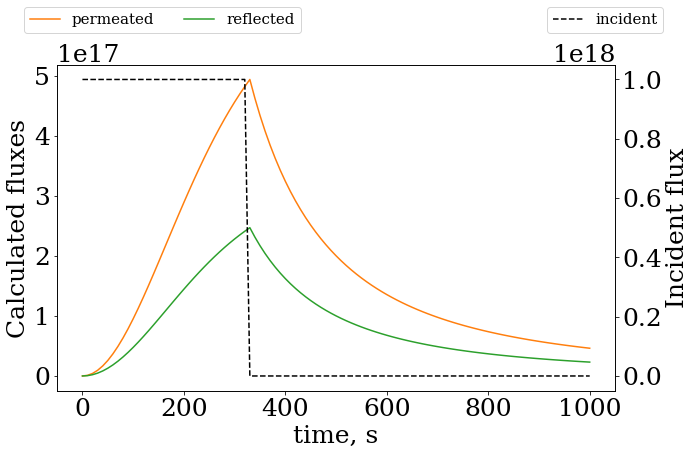

In [29]:
gcf().set_size_inches([10,6])
ax = gca()

ax.plot(result['time'],result['pdp'],'C1',label='permeated')
ax.plot(result['time'],result['reflected'],'C2',label='reflected')

axt = ax.twinx()
axt.plot(result['time'],params['G']*params['ks'],'k--',label='incident')

ax.legend(ncol=2,loc=1,bbox_to_anchor=[0.45,1.2],fontsize=15,)
axt.legend(loc=1,bbox_to_anchor=[1.1,1.2],fontsize=15)
ax.set_xlabel('time, s')
ax.set_ylabel('Calculated fluxes')
axt.set_ylabel('Incident flux')

## Non-square incident flux

In [30]:
Nt = params['Nt']
G = np.array([1+0.05*np.sin(ll*.06) for ll in np.linspace(0,300,Nt+1)])
G[50:]=0
params["G"] = G

## Calculate

In [31]:
result = BE(**params)

# Plot

Text(0, 0.5, 'Incident flux')

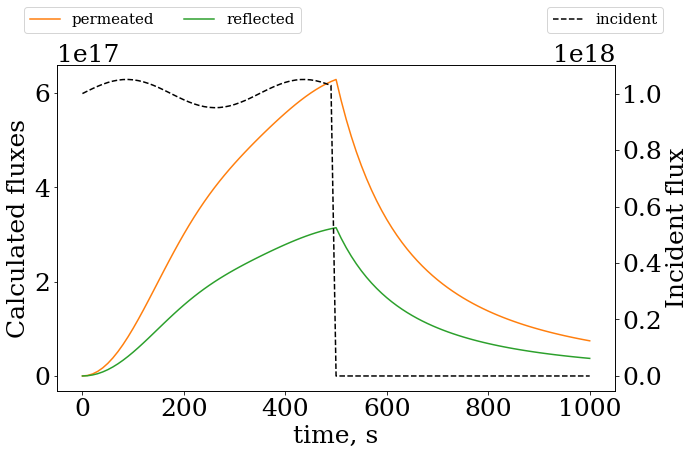

In [32]:
gcf().set_size_inches([10,6])
ax = gca()

ax.plot(result['time'],result['pdp'],'C1',label='permeated')
ax.plot(result['time'],result['reflected'],'C2',label='reflected')

axt = ax.twinx()
axt.plot(result['time'],params['G']*params['ks'],'k--',label='incident')

ax.legend(ncol=2,loc=1,bbox_to_anchor=[0.45,1.2],fontsize=15,)
axt.legend(loc=1,bbox_to_anchor=[1.1,1.2],fontsize=15)
ax.set_xlabel('time, s')
ax.set_ylabel('Calculated fluxes')
axt.set_ylabel('Incident flux')